In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
student_mat = pd.read_csv('./student-mat.csv')
student_por = pd.read_csv('./student-por.csv')


In [41]:
#student_mat.shape[0]
student_por.shape[0]

649

In [39]:
student_por.groupby("school").count()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,423,423,423,423,423,423,423,423,423,423,...,423,423,423,423,423,423,423,423,423,423
MS,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226


In [3]:
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
#Nos quedamos con los que solamente estan cercanos a la escuela alumnos matematica
student_mat_cercania = student_mat.loc[student_mat.reason.str.contains('home'),:]

student_mat_cercania.G3.mean()

10.256880733944953

In [6]:
#Nos quedamos con los que solamente estan cercanos a la escuela
student_por_cercania = student_por.loc[student_por.reason.str.contains('home'),:]

student_por_cercania.G3.mean()

12.181208053691275

In [59]:
#Promedio  de notas por escuela
student_mat.groupby("school").mean()
#student_por.groupby("school").mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826


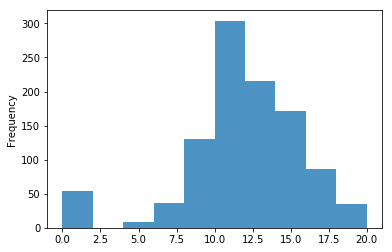

In [7]:
#Histograma de notas finales 

frames = [student_mat, student_por]

students = pd.concat(frames)

students.G3.plot.hist(alpha=0.8)

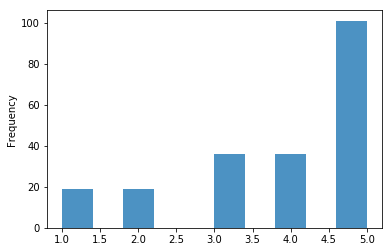

In [56]:
#Quedemos con los que consume alcohol y veamos como influye en la salud

frames = [student_mat, student_por]

students = pd.concat(frames)

students_high_alcohol = students.loc[students.Walc > 3,]

students_high_alcohol.health.plot.hist(alpha=0.8)


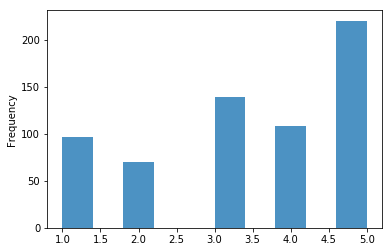

In [57]:
#Quedemos con los que consume alcohol y veamos como influye en la salud

frames = [student_mat, student_por]

students = pd.concat(frames)

students_low_alcohol = students.loc[students.Walc < 3,]

students_low_alcohol.health.plot.hist(alpha=0.8)


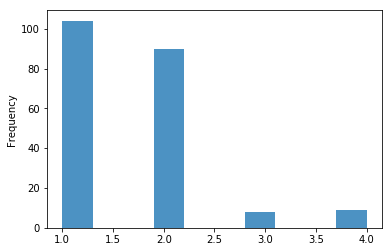

In [58]:
#Quedemos con los que consume alcohol y veamos como influye en el tiempo de estudio

frames = [student_mat, student_por]

students = pd.concat(frames)

students_high_alcohol_study = students.loc[students.Walc > 3,]

students_high_alcohol_study.studytime.plot.hist(alpha=0.8)


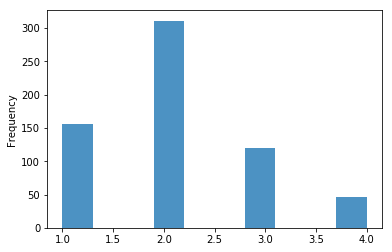

In [60]:
#Quedemos con los que consume alcohol y veamos como influye en el tiempo de estudio

frames = [student_mat, student_por]

students = pd.concat(frames)

students_high_alcohol_study = students.loc[students.Walc < 3,]

students_high_alcohol_study.studytime.plot.hist(alpha=0.8)

In [68]:
#Veamos el nivel de educacion de la madre y veamos el promedio de las notas finales en base al nivel de educacion

frames = [student_mat, student_por]

students = pd.concat(frames)

students.groupby('Medu')['G3'].mean().plot(kind='bar')

Medu
0    12.111111
1    10.178218
2    10.972318
3    11.247899
4    12.509804
Name: G3, dtype: float64

In [69]:
#Veamos el nivel de educacion del padre y veamos el promedio de las notas finales en base al nivel de educacion

frames = [student_mat, student_por]

students = pd.concat(frames)

students.groupby('Fedu')['G3'].mean()

Fedu
0    12.333333
1    10.367188
2    11.243827
3    11.636364
4    12.254464
Name: G3, dtype: float64

romantic
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Walc, dtype: object

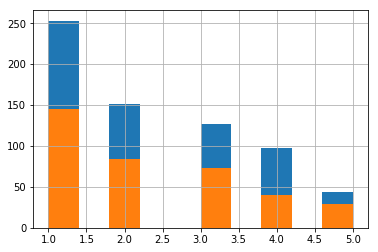

In [69]:
#Aquellos que estan en una relacion consumen mas alcohol
frames = [student_mat, student_por]

students = pd.concat(frames)

students.groupby('romantic')['Walc'].hist(alpha=0.5)

famsize
GT3    AxesSubplot(0.125,0.125;0.775x0.755)
LE3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: G3, dtype: object

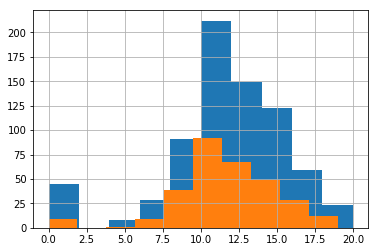

In [54]:
#Veamos las familias que tiene mas de 3 integrantes

frames = [student_mat, student_por]

students = pd.concat(frames)

#students = students.loc[students.famsize == "GT3",]

students.groupby("famsize")['G3'].hist()


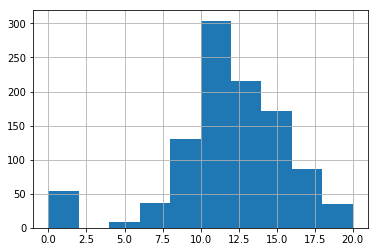

In [65]:
#Los alumnos que rendimiento

frames = [student_mat, student_por]

students = pd.concat(frames)

#students_parents_home = students.loc[students.Mjob.str.contains('at_home') ,]

students.G3.hist()

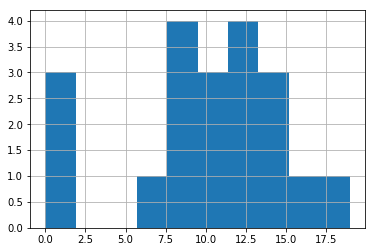

In [67]:
#Madre mateaticas promedio
#frames = [student_mat, student_por]

#students = pd.concat(frames)

students_parents_home = student_mat.loc[student_mat.Fjob.str.contains('at_home') ,]
students_parents_home.G3.hist()

In [7]:
#La mayoría de las familias tienen hasta 3 miembros 

frames = [student_mat, student_por]

students = pd.concat(frames)

students.groupby("famsize")["G3"].count()

famsize
GT3    738
LE3    306
Name: G3, dtype: int64

In [35]:
#Las aspiraciones a futuro o plan de carrera no influyen en el nivel de consumo de alcohol

frames = [student_mat, student_por]

students = pd.concat(frames)

stu_cant_notas = students.groupby("age").G3.count().to_frame("cantidad_notas").reset_index()
stu_promedio_notas = students.groupby("age").G3.mean().to_frame("promedio_notas").reset_index()

stu_final = pd.merge(stu_cant_notas, stu_promedio_notas, on='age')
stu_final.head(10)




#a = students.groupby("age")['G3'].agg({'Promedio' : ['mean'],'cantidad' : ['count']}).reset_index()

#a = a.iloc[a.cantidad > 100,:]

AttributeError: 'numpy.float64' object has no attribute 'to_frame'

In [29]:
#Cantidad ausencias por area rural


address
R    1158
U    3472
Name: absences, dtype: int64

In [31]:
#Areas rurales promedio de notas

rural = students.loc[students.address == 'R',]

rural.groupby("absences").count()

#rural.groupby("absences")["G3"].hist()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
absences,,,,,,,,,,,,,,,,,,,,,
0,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
1,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
4,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
5,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
6,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [32]:
#Areas rurales promedio de notas

rural = students.loc[students.address == 'U',]

rural.groupby("absences").count()
#rural.groupby("absences")["G3"].hist()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
absences,,,,,,,,,,,,,,,,,,,,,
0,262,262,262,262,262,262,262,262,262,262,...,262,262,262,262,262,262,262,262,262,262
1,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
3,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
5,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
7,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
8,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
